In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

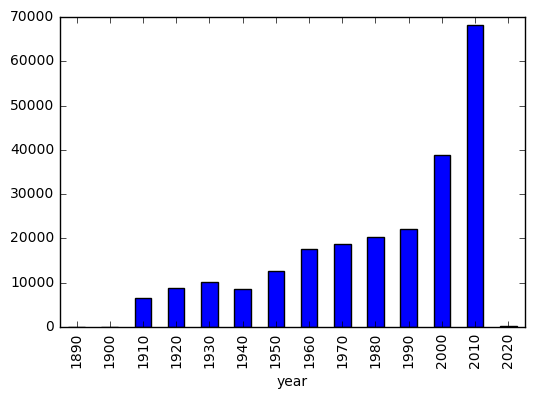

In [6]:
t = titles
#t.head()
t.groupby(t.year // 10 * 10).size().plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

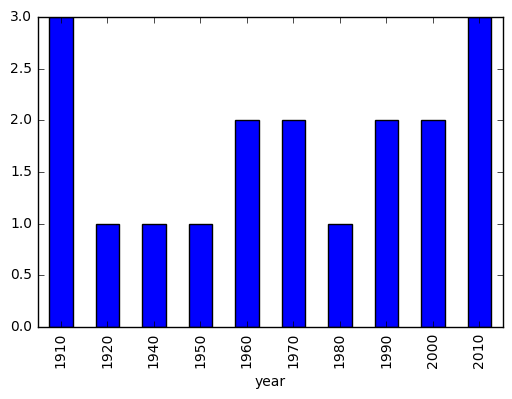

In [7]:
t = titles
#t.head()
t = t[t['title'] == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [8]:
c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      626
      actress    281
1951  actor      647
      actress    282
1952  actor      607
      actress    293
1953  actor      651
      actress    302
1954  actor      639
      actress    310
1955  actor      640
      actress    282
1956  actor      643
      actress    305
1957  actor      735
      actress    302
1958  actor      710
      actress    295
1959  actor      722
      actress    317
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [9]:
c = cast
c = c[c.year // 10 == 195]
c = c[(c.n >= 1) & (c.n <= 5)] #or c.n < 6
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6620
     actress    2969
2.0  actor      4568
     actress    4561
3.0  actor      5592
     actress    3151
4.0  actor      5595
     actress    2849
5.0  actor      5613
     actress    2544
dtype: int64

### Use groupby() to determine how many roles are listed for each of the The Pink Panther movies.

In [12]:
c = cast
c = c[c.title == 'The Pink Panther']
# c.groupby(['year']).size()
c.sort_values('n').groupby(['year'])[['n']].max()

,n
year,
1963,15.0
2006,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [109]:
c = cast
c = c[c.name == 'Frank Oz'].sort_values('year')
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [115]:
c = cast
c = c[c.name == 'Frank Oz']
c = c.groupby(['character']).size()
c[c > 1].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64

## PRACTICE PART - WORKING WITH INDEXES

In [9]:
len(cast)

3638844

In [38]:
%%time
c = cast[cast.title == 'Sleuth'] #this is 4 million questions implicitly
c.head()

CPU times: user 229 ms, sys: 4.06 ms, total: 233 ms
Wall time: 235 ms


In [46]:
c = cast.set_index(['title']).sort_index()
#here we take some time ordering, but later it will be better for using .loc
c.head()

name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [44]:
%%time
c.loc['Star Wars']
#.loc helps reduce time, if the indexes are ordered (divide and conquer algorithm)

CPU times: user 827 µs, sys: 196 µs, total: 1.02 ms
Wall time: 901 µs


,year,name,type,character,n
title,,,,,
Star Wars,1977,Ted Burnett,actor,Wuher,NaN
Star Wars,1977,Peter Cushing,actor,Grand Moff Tarkin,4.0
Star Wars,1977,Rusty Goffe,actor,Kabe,NaN
Star Wars,1977,Mahjoub,actor,Jawa,NaN
Star Wars,1977,Harold Weed,actor,Ketwol,NaN
Star Wars,1977,James Earl Jones,actor,Darth Vader,NaN
Star Wars,1977,Lorne Peterson,actor,Massassi Base Rebel Scout,NaN
Star Wars,1977,Rusty Goffe,actor,GONK Droid,NaN
Star Wars,1977,Mark Anthony Austin,actor,Boba Fett (special edition),NaN


In [47]:
c = cast.set_index(['title', 'year']).sort_index()
#two level index
c.head()

name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [49]:
%%time
c.loc['Sleuth'].head()

CPU times: user 44.1 ms, sys: 32 ms, total: 76.1 ms
Wall time: 75.6 ms


,name,type,character,n
year,,,,
1972,Michael Caine,actor,Milo Tindle,2.0
1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1972,Teddy Martin,actor,Police Constable Higgs,6.0
1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1972,Laurence Olivier,actor,Andrew Wyke,1.0


In [52]:
%%time
#c.loc['Sleuth'].loc[1972].head() #or
c.loc['Sleuth', 1972].head()

CPU times: user 46.4 ms, sys: 36.3 ms, total: 82.7 ms
Wall time: 82.2 ms


name   type                   character    n
title  year                                                            
Sleuth 1972       Michael Caine  actor                 Milo Tindle  2.0
       1972      Alec Cawthorne  actor           Inspector Doppler  3.0
       1972        Teddy Martin  actor      Police Constable Higgs  6.0
       1972  John (II) Matthews  actor  Detective Sergeant Tarrant  4.0
       1972    Laurence Olivier  actor                 Andrew Wyke  1.0

In [56]:
#c.loc['Sleuth', 1972].reset_index('year')
#c.loc['Sleuth', 1972].reset_index('title')
c.loc['Sleuth', 1972].reset_index(['year', 'title'])

,title,year,name,type,character,n
0,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
1,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
2,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
3,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
4,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
5,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


# GROUPBY

In [60]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['year', 'title', 'character']).size() #groupby makes an object waiting for an operation, in this case .size

year  title                               character               
1983  Grizzly II: The Concert             Ron                         1
1987  Return to Horror High               Oliver                      1
1988  Return of the Killer Tomatoes!      Matt Stevens                1
1992  The Harvest                         Lip Syncing Transvestite    1
      Unbecoming Age                      Mac                         1
1996  Curdled                             Seth Gecko                  1
      From Dusk Till Dawn                 Seth Gecko                  1
      One Fine Day                        Jack Taylor                 1
1997  Batman & Robin                      Batman                      1
                                          Bruce Wayne                 1
      The Peacemaker                      Lt. Col. Thomas Devoe       1
1998  Out of Sight                        Jack Foley                  1
      The Thin Red Line                   Capt. Charles Bosche       

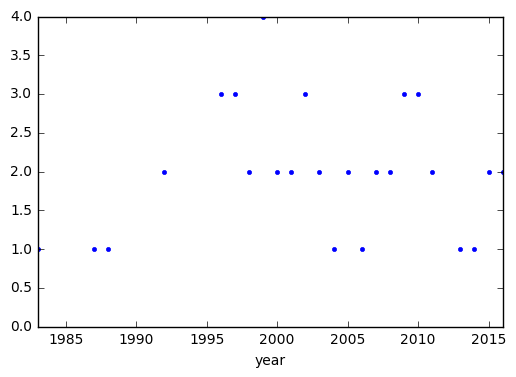

In [63]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['year']).size().plot(ylim=0, style = '.')

In [67]:
c = cast
c = c[c.name == 'George Clooney']
#c.groupby(['year']).n.min()
#you can group by any series, even if it's not part of the dataframe
c.groupby(c.year // 10 * 10).n.size() #decades are not in the table, however i group by this new series

year
1980     3
1990    14
2000    20
2010    11
dtype: int64

# Stack and unstack

In [116]:
#get the groupby by more than one argument; one argument is a new series
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27106
      actress     15497
1920  actor       47899
      actress     23588
1930  actor      149982
      actress     49150
1940  actor      160845
      actress     51076
1950  actor      155223
      actress     56470
1960  actor      131147
      actress     56080
1970  actor      150174
      actress     65114
1980  actor      193995
      actress     89389
1990  actor      259368
      actress    122605
2000  actor      485639
      actress    261139
2010  actor      696604
      actress    390440
2020  actor         159
      actress        82
dtype: int64

In [121]:
#unstack operation
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
g = c.groupby(['character', c.year // 10 * 10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [140]:
u = g.unstack(0).fillna(0) #fillna instead of looking a NaN
#0 is the character, 1 is the year
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [141]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    1.0
1980    2.0
1990    1.0
2000    0.0
2010    1.0
dtype: float64

In [138]:
u.stack() #the reverse operation

year  character       
1970  Kermit the Frog     1.0
1980  Kermit the Frog     4.0
      Oscar the Grouch    2.0
1990  Kermit the Frog     2.0
      Oscar the Grouch    1.0
2000  Kermit the Frog     1.0
      Oscar the Grouch    1.0
2010  Kermit the Frog     1.0
dtype: float64

In [146]:
df = g.unstack('character')
df['extra'] = 1
df = df.set_index('extra', append = True)
df.unstack(0)
#the row index should never be empty with unstack or i'll get a sereis

character Kermit the Frog                     Oscar the Grouch                 \
year                 1970 1980 1990 2000 2010             1970 1980 1990 2000   
extra                                                                           
1                     1.0  4.0  2.0  1.0  1.0              NaN  2.0  1.0  1.0   

character       
year      2010  
extra           
1          NaN